In [23]:
import joblib, shap, mlflow, os, numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [24]:
X, y = load_iris(return_X_y=True)
model = RandomForestClassifier().fit(X, y)
joblib.dump(model, '../models/model.pkl')

['../models/model.pkl']

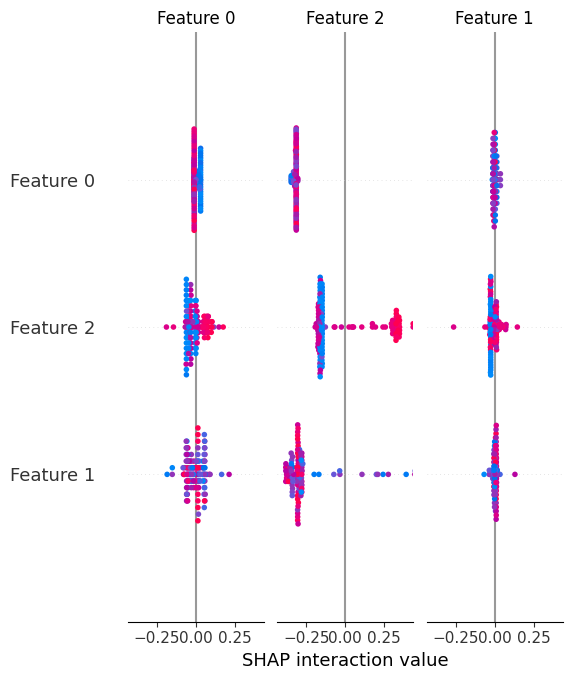

In [25]:
model = joblib.load('../models/model.pkl')
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X)

# Plot summary
shap.summary_plot(shap_values, X)


In [26]:
with mlflow.start_run():
    model = RandomForestClassifier()
    model.fit(X, y)

    mlflow.sklearn.log_model(model, "iris_model")
    mlflow.log_param("n_estimators", model.n_estimators)
    mlflow.log_metric("train_accuracy", model.score(X, y))

2025/07/02 02:23:45 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/07/02 02:23:48 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


In [28]:
# get current notebook dir
notebook_dir = os.getcwd()

# go up to project root if your notebook is in xaas/notebooks
root_dir = os.path.abspath(os.path.join(notebook_dir, ".."))

app_dir = os.path.join(root_dir, "app")
os.makedirs(app_dir, exist_ok=True)

data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(
    data.data, data.target, test_size=0.2, random_state=42
)

np.save(os.path.join(app_dir, "training_data.npy"), X_train)


In [ ]:
import os
os.makedirs("app", exist_ok=True)